In [ ]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 KB 2.4 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [ ]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 36.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.2 MB/s eta 0:00:00


# Vehicle Insurance Classification

***

***
# 1- Get the Data
***

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/train.csv")
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,508077,Male,39,1,28.0,0,1-2 Year,Yes,33670.0,124.0,133,1
1,116379,Male,60,1,9.0,1,1-2 Year,Yes,32660.0,26.0,64,0
2,24159,Female,20,1,43.0,0,< 1 Year,No,2630.0,160.0,283,0
3,129481,Female,22,1,47.0,0,< 1 Year,Yes,32665.0,26.0,42,0
4,469280,Male,25,1,28.0,1,< 1 Year,No,21602.0,152.0,293,0


In [ ]:
data.shape

(244578, 12)

In [ ]:
test = pd.read_csv("/content/test.csv")
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,380337,Male,30,1,28.0,1,< 1 Year,No,60954.0,152.0,127
1,60095,Male,40,1,0.0,0,1-2 Year,Yes,2630.0,47.0,220
2,491957,Female,40,1,8.0,0,1-2 Year,Yes,37922.0,124.0,47
3,42481,Male,51,1,46.0,0,1-2 Year,Yes,31149.0,124.0,279
4,25992,Male,24,1,41.0,1,< 1 Year,No,20588.0,152.0,74


In [ ]:
test.shape

(61145, 11)

#### Dispaly code .

In [ ]:
pd.set_option('display.max_columns', None)
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,244578.000000,244578.000000,244578.000000,244578.000000,244578.000000,244578.000000,244578.000000,244578.000000,244578.000000
mean,234645.165109,38.516400,0.998091,26.407007,0.489713,30705.566331,111.942566,154.291228,0.163617
std,139466.538310,15.221267,0.043655,13.179890,0.499895,16994.006743,54.304292,83.667275,0.369928
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,115277.000000,25.000000,1.000000,15.000000,0.000000,24560.000000,26.000000,82.000000,0.000000
50%,230961.500000,36.000000,1.000000,28.000000,0.000000,31688.000000,147.000000,154.000000,0.000000
75%,345559.750000,49.000000,1.000000,35.000000,1.000000,39424.000000,152.000000,227.000000,0.000000
max,508144.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


***
# 2- Discover and visualize the data
***

## A- Data discovery

### **Train data**

In [ ]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,508077,Male,39,1,28.0,0,1-2 Year,Yes,33670.0,124.0,133,1
1,116379,Male,60,1,9.0,1,1-2 Year,Yes,32660.0,26.0,64,0
2,24159,Female,20,1,43.0,0,< 1 Year,No,2630.0,160.0,283,0
3,129481,Female,22,1,47.0,0,< 1 Year,Yes,32665.0,26.0,42,0
4,469280,Male,25,1,28.0,1,< 1 Year,No,21602.0,152.0,293,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244578 entries, 0 to 244577
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    244578 non-null  int64  
 1   Gender                244578 non-null  object 
 2   Age                   244578 non-null  int64  
 3   Driving_License       244578 non-null  int64  
 4   Region_Code           244578 non-null  float64
 5   Previously_Insured    244578 non-null  int64  
 6   Vehicle_Age           244578 non-null  object 
 7   Vehicle_Damage        244578 non-null  object 
 8   Annual_Premium        244578 non-null  float64
 9   Policy_Sales_Channel  244578 non-null  float64
 10  Vintage               244578 non-null  int64  
 11  Response              244578 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 22.4+ MB


In [ ]:
print(f'percentage of uniqueness of id column: {data.id.nunique()/len(data)*100}')
# There is no any duplicated value

percentage of uniqueness of id column: 100.0


In [ ]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,244578.000000,244578.000000,244578.000000,244578.000000,244578.000000,244578.000000,244578.000000,244578.000000,244578.000000
mean,234645.165109,38.516400,0.998091,26.407007,0.489713,30705.566331,111.942566,154.291228,0.163617
std,139466.538310,15.221267,0.043655,13.179890,0.499895,16994.006743,54.304292,83.667275,0.369928
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,115277.000000,25.000000,1.000000,15.000000,0.000000,24560.000000,26.000000,82.000000,0.000000
50%,230961.500000,36.000000,1.000000,28.000000,0.000000,31688.000000,147.000000,154.000000,0.000000
75%,345559.750000,49.000000,1.000000,35.000000,1.000000,39424.000000,152.000000,227.000000,0.000000
max,508144.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
for col in data.columns[1:]:
  print(data[col].value_counts())

Male      131588
Female    112990
Name: Gender, dtype: int64
24    16842
23    15661
25    13397
22    13292
21    10124
      ...  
81       37
82       21
83       18
84        9
85        9
Name: Age, Length: 66, dtype: int64
1    244111
0       467
Name: Driving_License, dtype: int64
28.0    68530
8.0     21774
46.0    12913
41.0    12249
15.0     8382
30.0     8206
29.0     7452
50.0     6504
3.0      5955
11.0     5948
36.0     5510
33.0     5135
35.0     4642
47.0     4629
6.0      4237
45.0     3568
18.0     3481
37.0     3200
14.0     3108
39.0     2864
10.0     2852
21.0     2821
48.0     2761
13.0     2598
2.0      2343
7.0      2125
12.0     2029
9.0      1887
32.0     1754
43.0     1672
17.0     1633
27.0     1594
25.0     1593
26.0     1537
24.0     1535
38.0     1306
23.0     1256
16.0     1254
4.0      1174
31.0     1146
0.0      1145
20.0     1092
49.0     1068
34.0     1007
19.0      956
5.0       795
40.0      787
22.0      782
1.0       602
44.0      519
42.0      3

### **Test data**

In [ ]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,380337,Male,30,1,28.0,1,< 1 Year,No,60954.0,152.0,127
1,60095,Male,40,1,0.0,0,1-2 Year,Yes,2630.0,47.0,220
2,491957,Female,40,1,8.0,0,1-2 Year,Yes,37922.0,124.0,47
3,42481,Male,51,1,46.0,0,1-2 Year,Yes,31149.0,124.0,279
4,25992,Male,24,1,41.0,1,< 1 Year,No,20588.0,152.0,74


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61145 entries, 0 to 61144
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    61145 non-null  int64  
 1   Gender                61145 non-null  object 
 2   Age                   61145 non-null  int64  
 3   Driving_License       61145 non-null  int64  
 4   Region_Code           61145 non-null  float64
 5   Previously_Insured    61145 non-null  int64  
 6   Vehicle_Age           61145 non-null  object 
 7   Vehicle_Damage        61145 non-null  object 
 8   Annual_Premium        61145 non-null  float64
 9   Policy_Sales_Channel  61145 non-null  float64
 10  Vintage               61145 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 5.1+ MB


In [ ]:
test.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,61145.000000,61145.000000,61145.000000,61145.000000,61145.000000,61145.000000,61145.000000,61145.000000
mean,233533.191447,38.569548,0.998168,26.509036,0.490539,30672.692289,111.866579,154.421899
std,139596.445407,15.195061,0.042760,13.172061,0.499915,17322.088571,54.297592,83.875760
min,11.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,114286.000000,25.000000,1.000000,15.000000,0.000000,24436.000000,26.000000,81.000000
50%,229272.000000,36.000000,1.000000,28.000000,0.000000,31670.000000,138.000000,155.000000
75%,344128.000000,49.000000,1.000000,35.000000,1.000000,39431.000000,152.000000,227.000000
max,508145.000000,85.000000,1.000000,52.000000,1.000000,472042.000000,163.000000,299.000000


In [ ]:
for col in test.columns[1:]:
  print(test[col].value_counts())

Male      33007
Female    28138
Name: Gender, dtype: int64
24    4261
23    3837
25    3397
22    3292
21    2520
      ... 
81       8
82       7
83       4
84       2
85       1
Name: Age, Length: 66, dtype: int64
1    61033
0      112
Name: Driving_License, dtype: int64
28.0    17195
8.0      5331
46.0     3213
41.0     3090
15.0     2098
30.0     2062
29.0     1910
50.0     1646
3.0      1509
11.0     1491
36.0     1409
33.0     1277
47.0     1211
35.0     1182
6.0       985
45.0      877
18.0      843
37.0      825
14.0      776
39.0      732
10.0      713
21.0      712
48.0      687
13.0      651
2.0       589
7.0       497
12.0      484
9.0       458
32.0      418
27.0      417
43.0      417
26.0      397
25.0      396
17.0      365
24.0      352
38.0      344
23.0      327
16.0      323
0.0       317
49.0      297
4.0       292
20.0      277
31.0      262
22.0      238
19.0      219
34.0      215
5.0       198
40.0      182
1.0       155
44.0      119
42.0       89
52.0       3

In [ ]:
ID_test=test["id"]

## B- Data visualization

### **Univariate Anaslysis**

In [ ]:
df_num = data.select_dtypes(exclude='object')
test_num = test.select_dtypes(exclude='object')

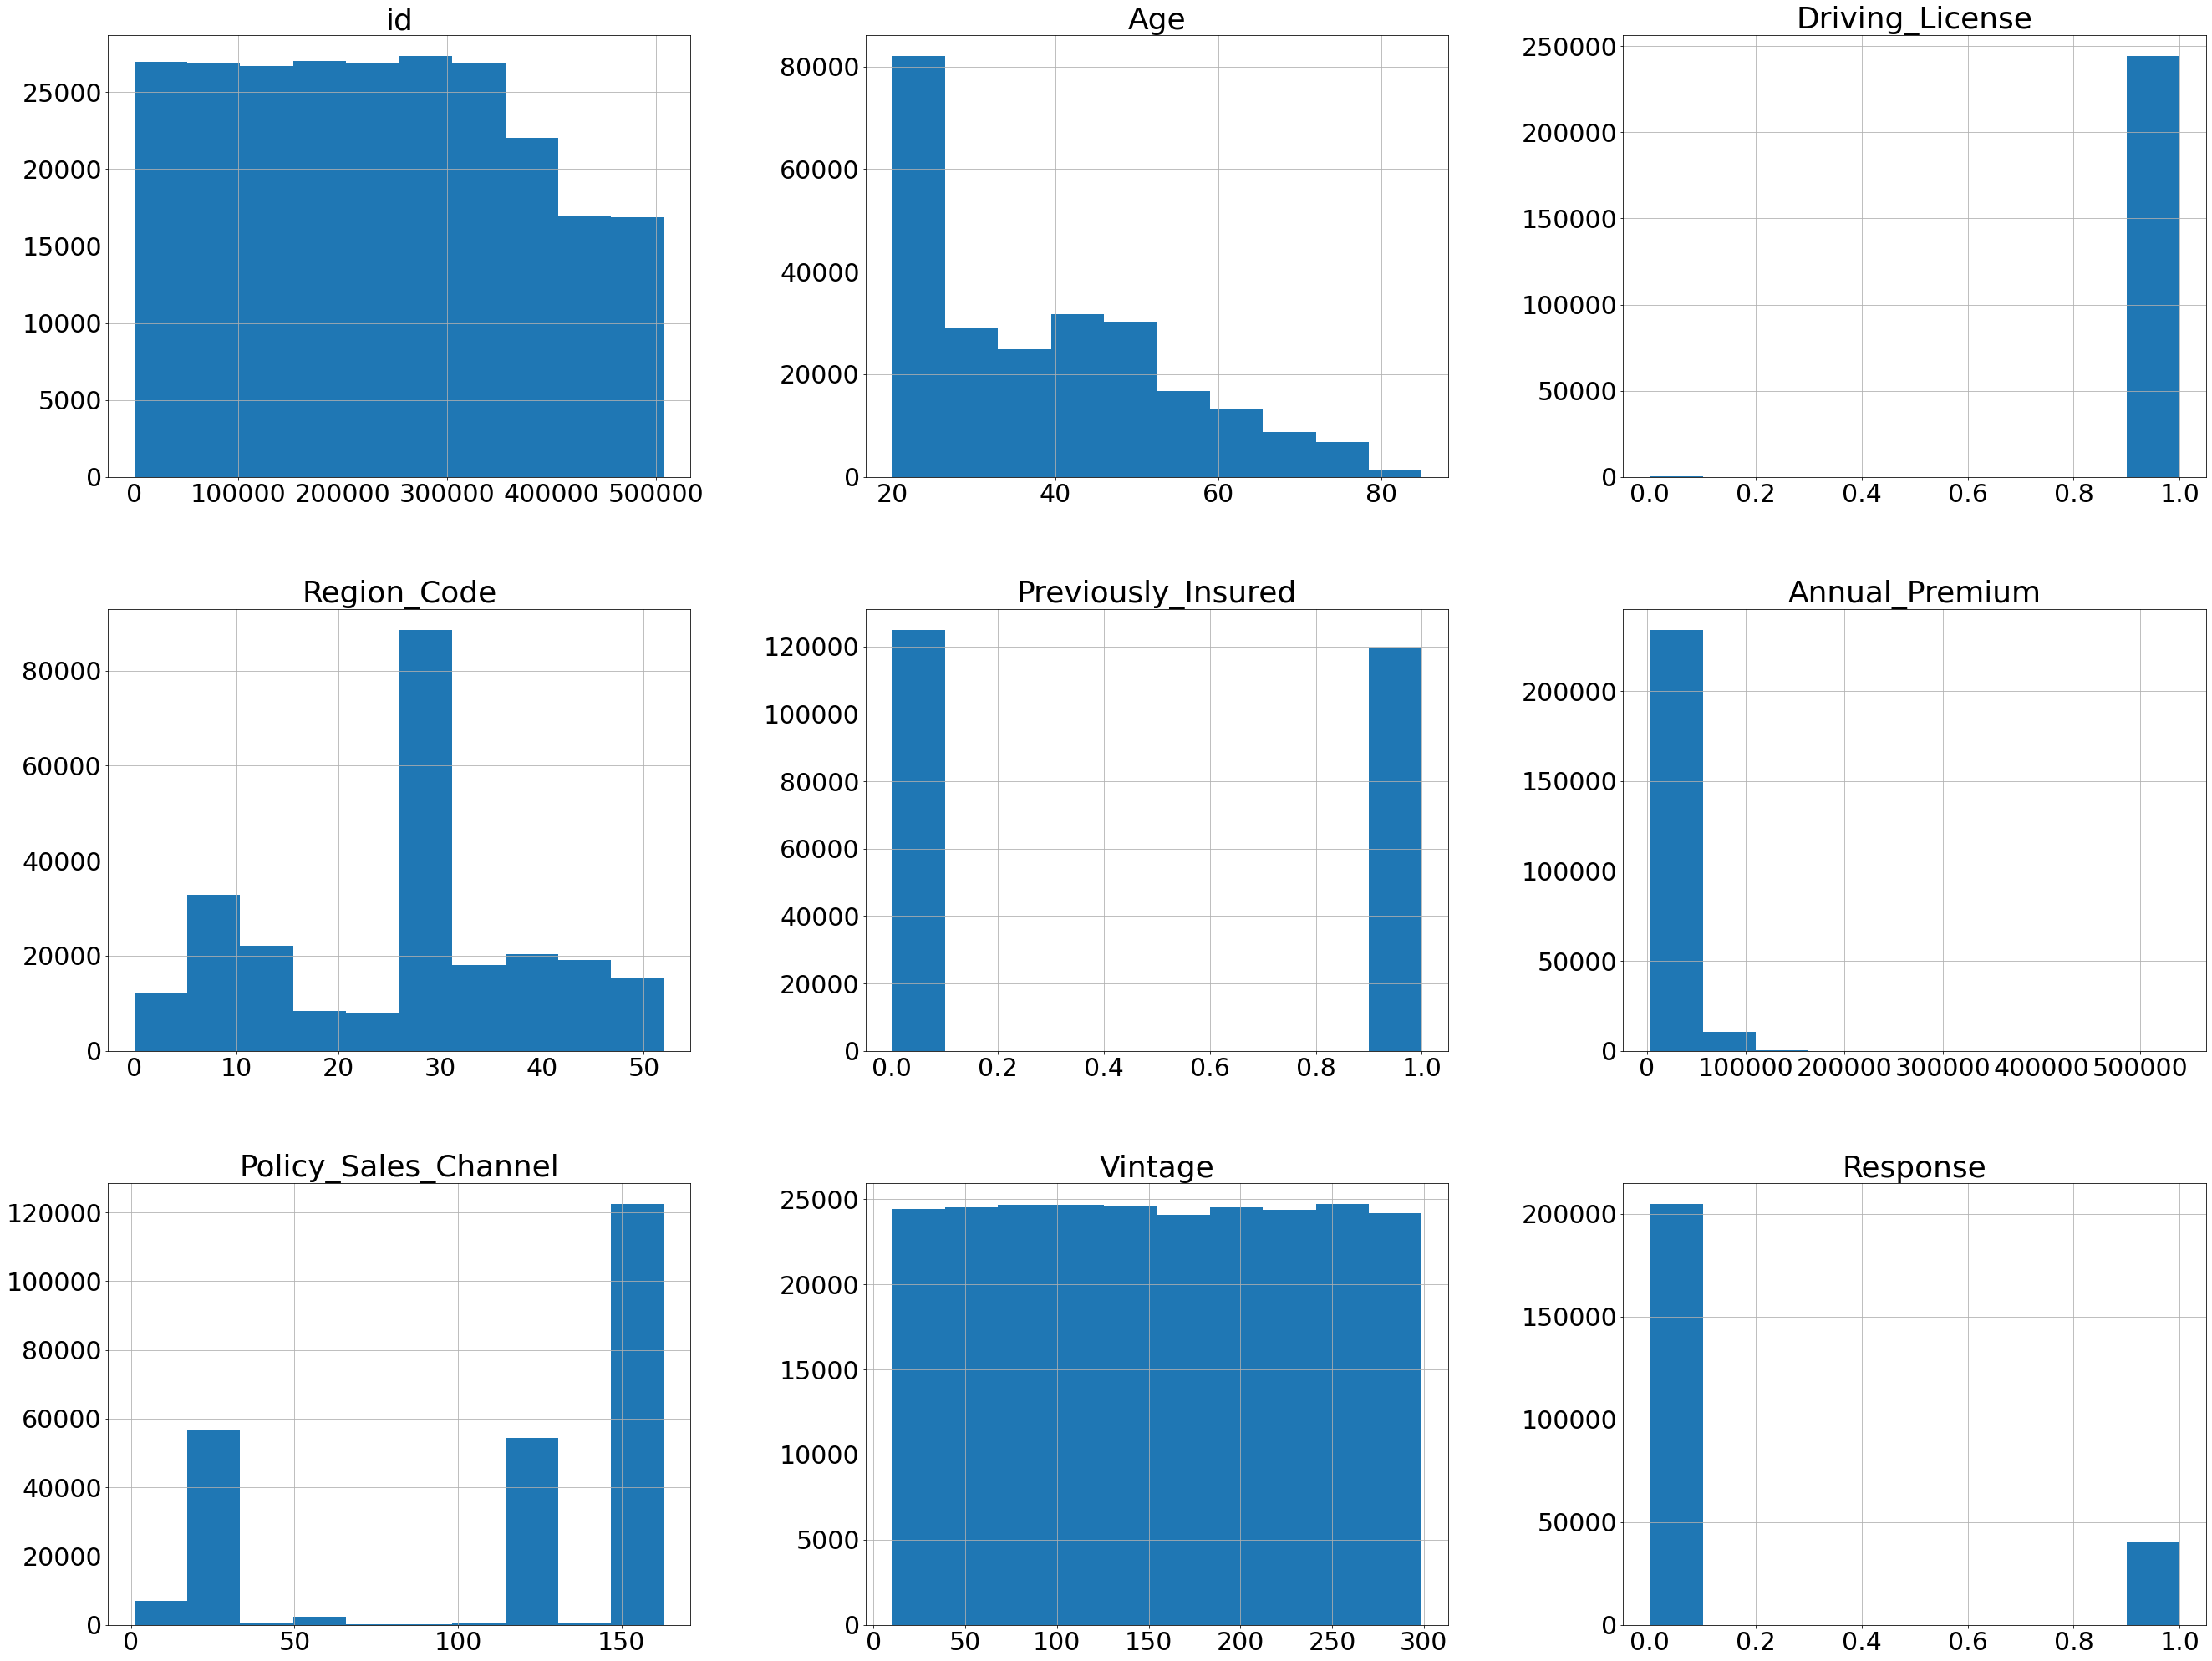

In [ ]:
plt.rc('font', size=30)
df_num.hist( figsize= (45 ,35),);

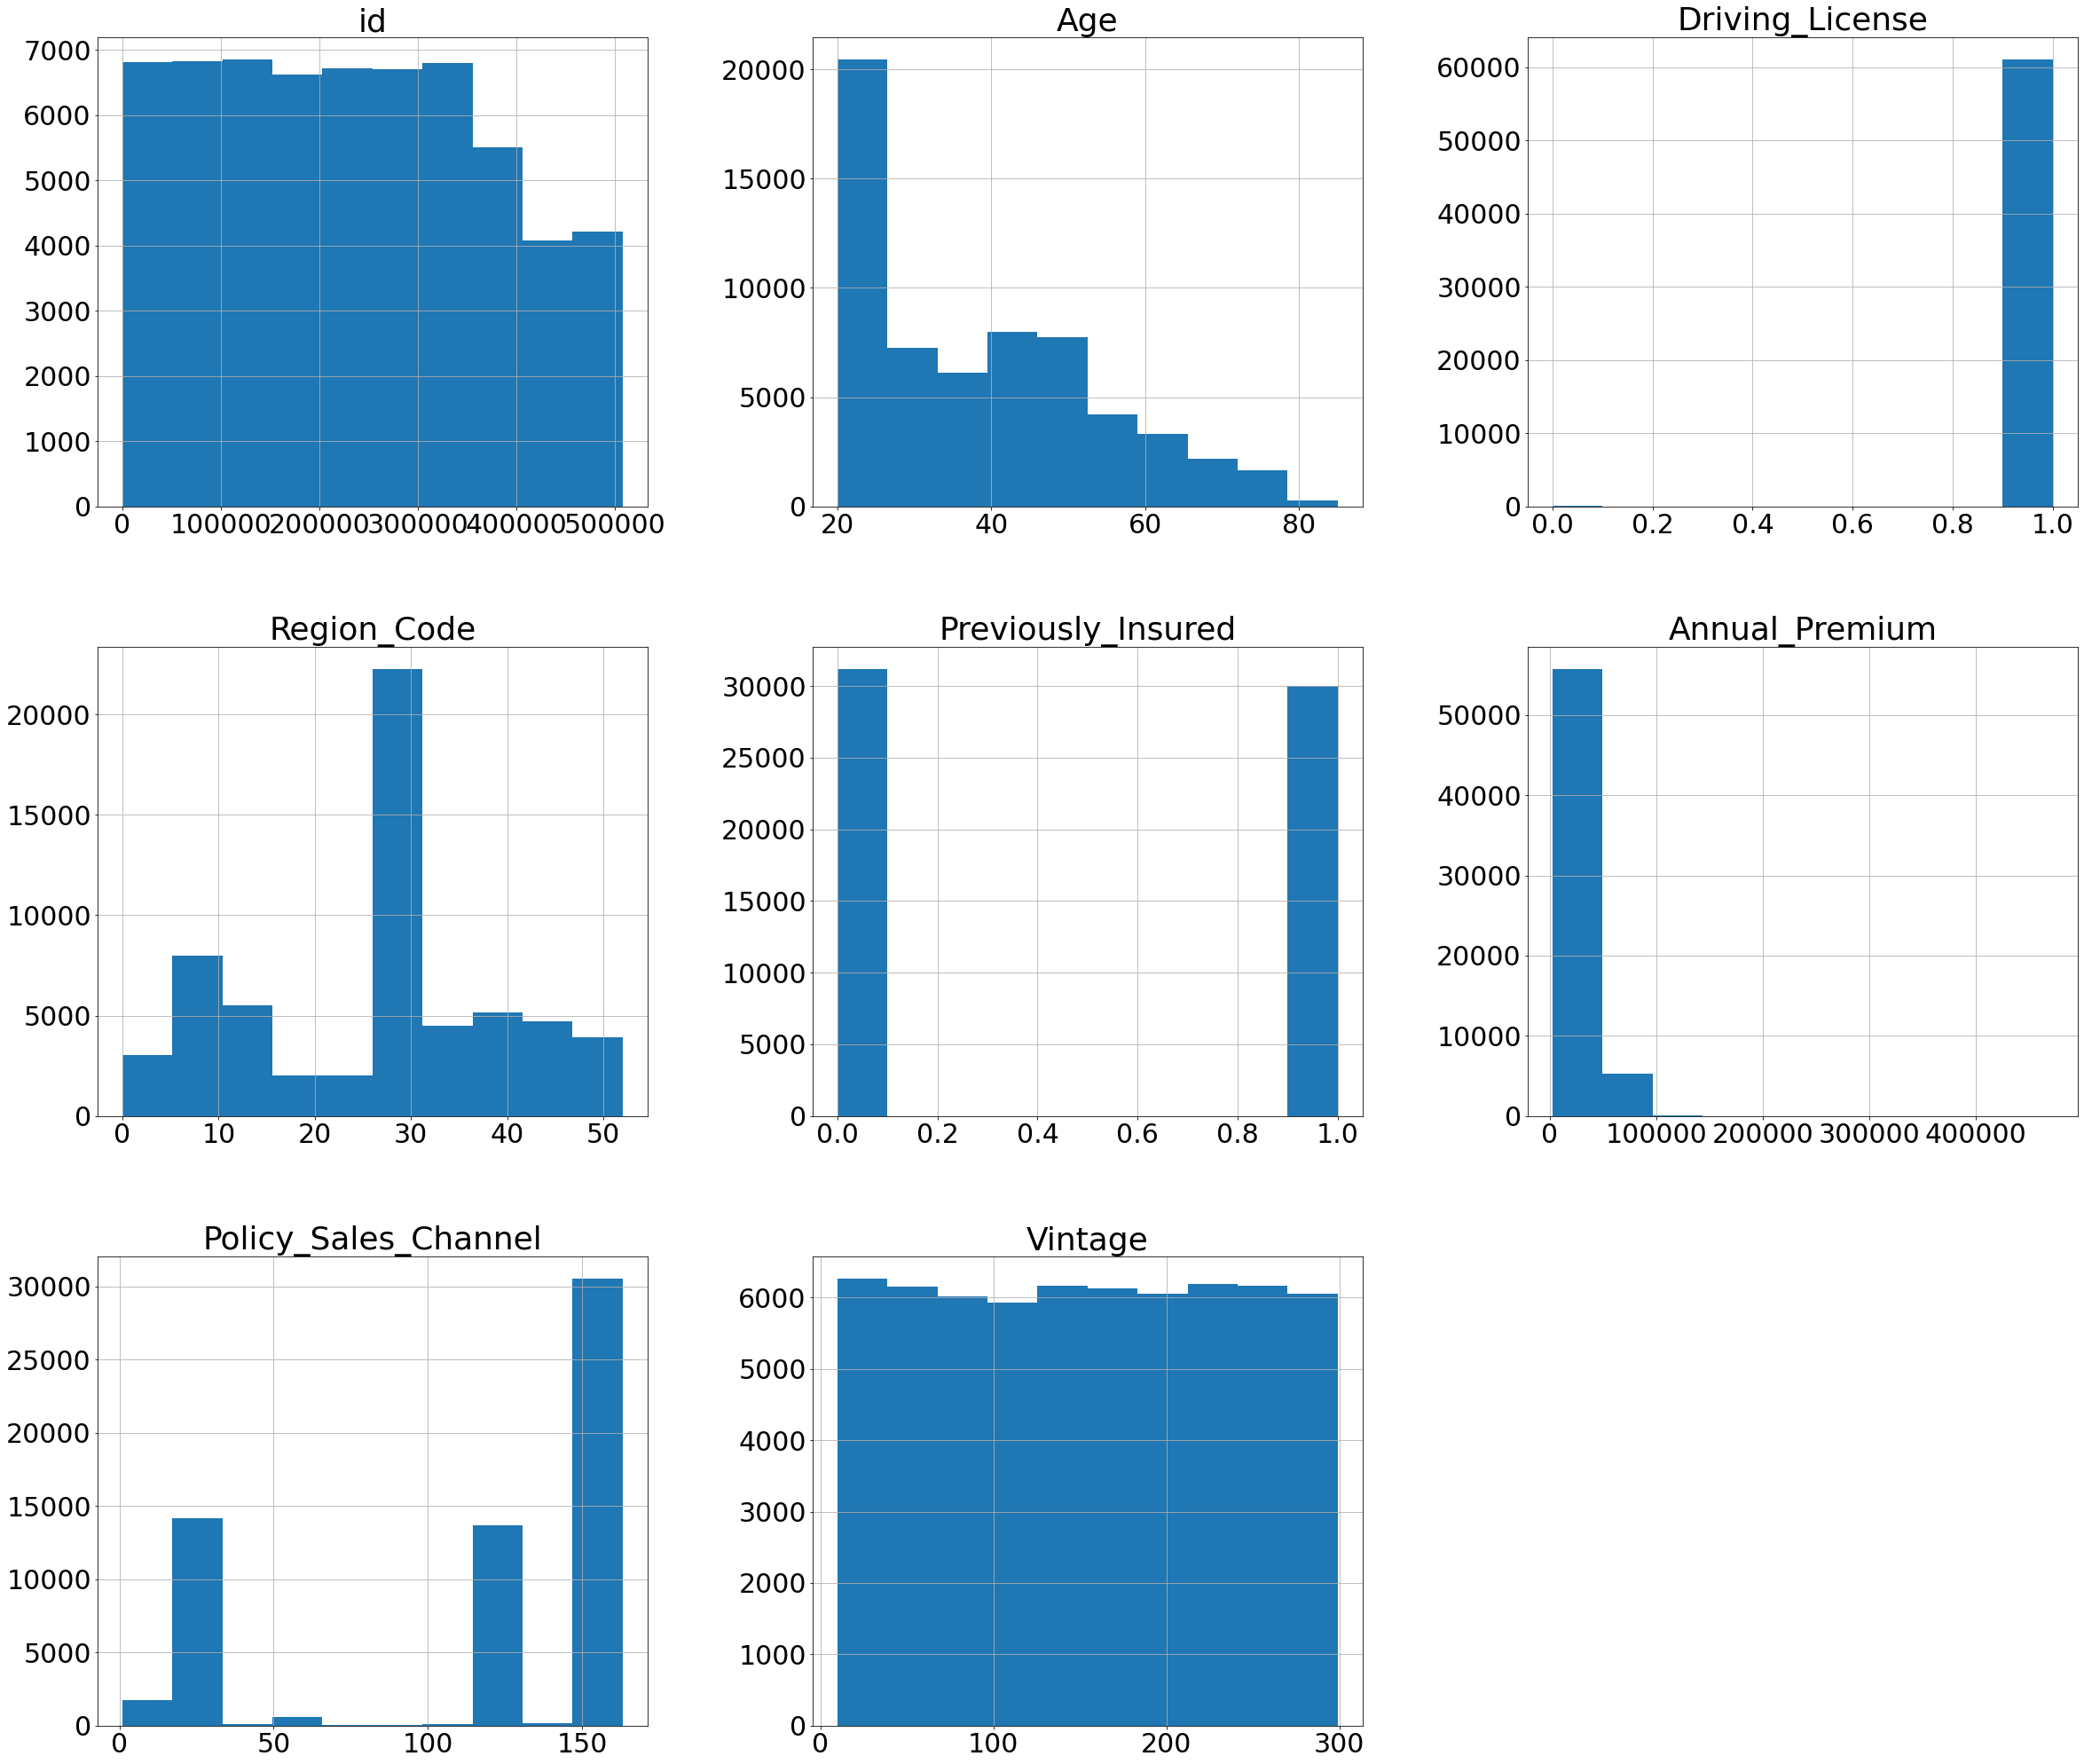

In [ ]:
test_num.hist( figsize= (40 ,35) );

In [ ]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


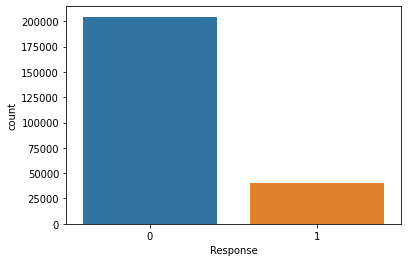

In [ ]:
plt.rc('font', size=10)
sns.countplot(data.Response)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


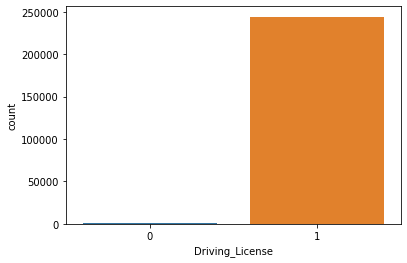

In [ ]:
plt.rc('font', size=10)
sns.countplot(data.Driving_License)
# atmost this column will be removed because it has very small variance

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


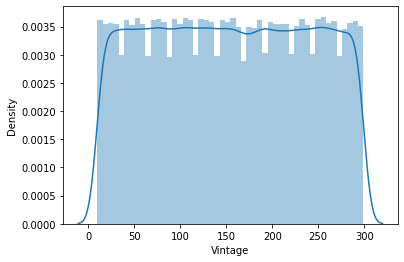

In [ ]:
sns.distplot(data['Vintage'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


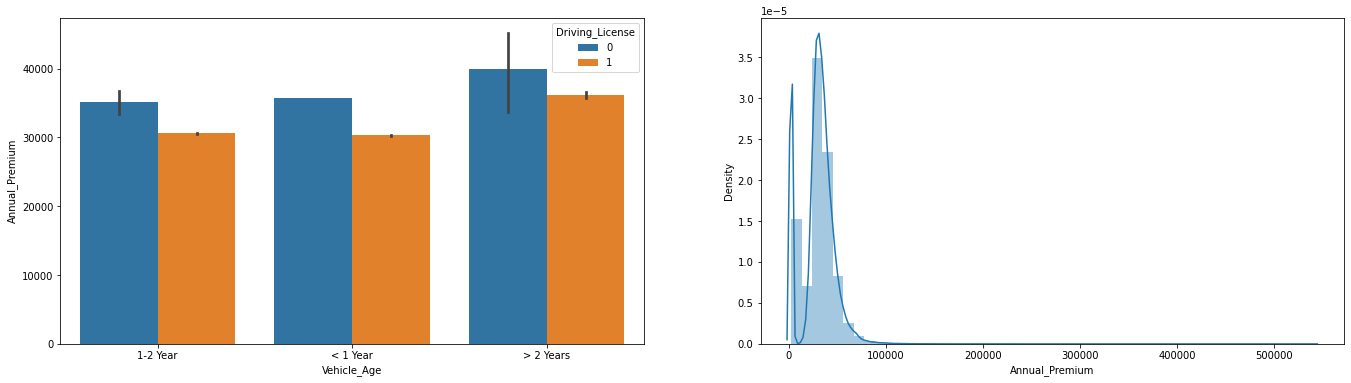

In [ ]:
plt.figure(figsize=(23,6))
plt.subplots_adjust(wspace=0.2)
plt.subplot(1,2,1)
sns.barplot(x=data['Vehicle_Age'], y=data['Annual_Premium'], hue=data['Driving_License'])
plt.subplot(1,2,2)
sns.distplot(data['Annual_Premium'])

In [ ]:
pd.crosstab(data.Response,data.Previously_Insured).style.background_gradient(cmap='summer_r')

Previously_Insured,0,1
Response,,
0,84875,119686
1,39930,87


In [ ]:
pd.crosstab(data.Response,data.Vehicle_Age).style.background_gradient(cmap='summer_r')

Vehicle_Age,1-2 Year,< 1 Year,> 2 Years
Response,,,
0,96877,101754,5930
1,31184,4880,3953


In [ ]:
pd.crosstab(data.Response,data.Vehicle_Damage).style.background_gradient(cmap='summer_r')

Vehicle_Damage,No,Yes
Response,,
0,126538,78023
1,530,39487


### **Bivariate Anaslysis**

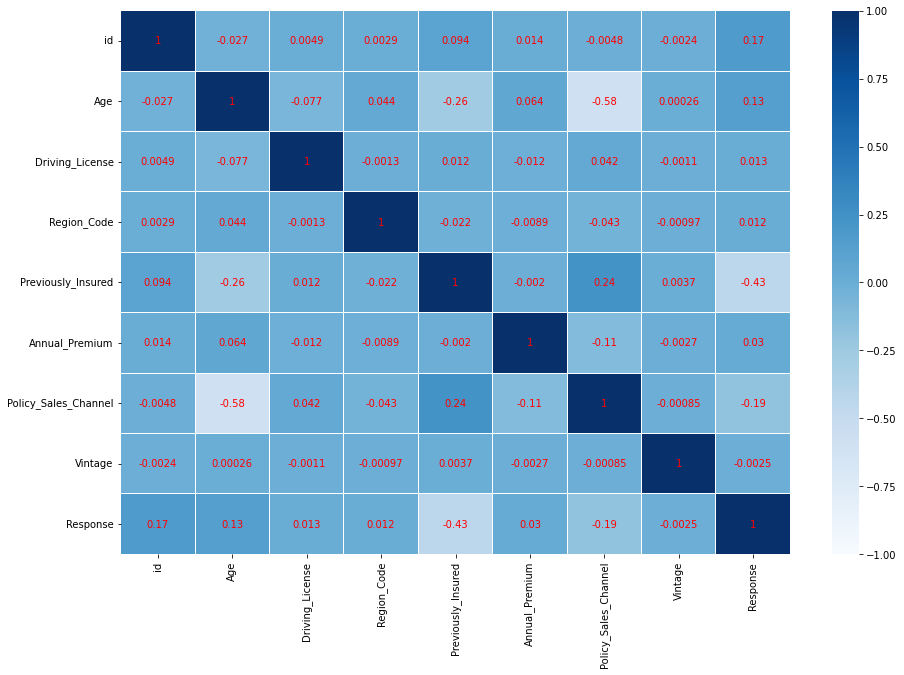

In [ ]:
corr_matrix = data.corr()
#corr_matrix[(corr_matrix < 0.2) & (corr_matrix > -0.2)] = 0
plt.figure(figsize = (15,10))
sns.heatmap(corr_matrix, vmax=1.0, vmin=-1.0, linewidths=0.2,
            annot_kws={"size": 10, "color": "Red"},annot=True, cmap='Blues')

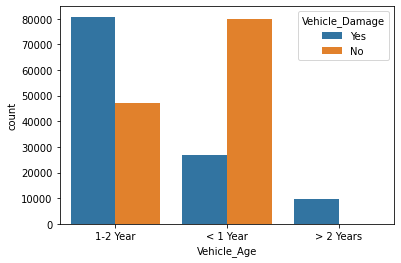

In [ ]:
sns.countplot(data=data,x='Vehicle_Age',hue='Vehicle_Damage')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


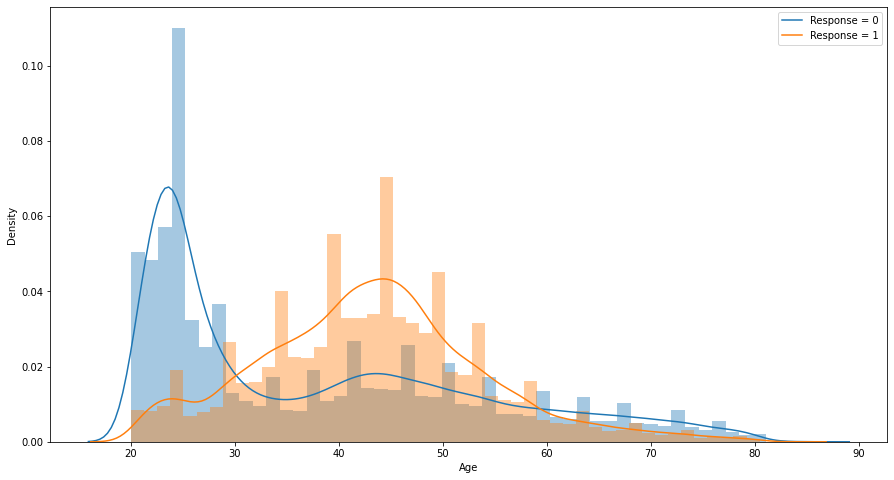

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (15,8))
sns.distplot(data[data.Response == 0]["Age"], ax = ax)
sns.distplot(data[data.Response == 1]["Age"], ax = ax)
plt.legend(["Response = 0", "Response = 1"])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


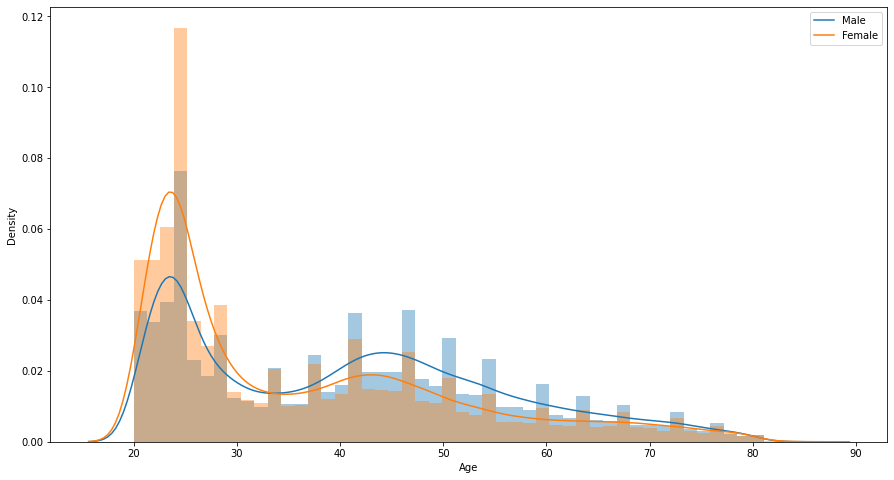

In [ ]:
plt.figure(figsize = (15,8))
sns.distplot(data.loc[data.Gender == "Male", "Age"])
sns.distplot(data.loc[data.Gender == "Female", "Age"])
plt.legend(["Male", "Female"])

***
# 3- Prepare the data & Train model
***

## A - Feature Engineering ( Adding new cfeatures )

In [ ]:
data["Age_range"] = pd.qcut(data.Age, 5, labels = [0, 1, 2, 3, 4]).astype('float64')
data["Annual_Premium_range"] = pd.qcut(data.Annual_Premium, 5, labels = [0, 1, 2, 3, 4]).astype('float64')
data["Vintage_range"] = pd.qcut(data.Vintage, 4, labels = [0, 1, 2, 3]).astype('float64')

In [ ]:
test["Age_range"] = pd.qcut(test.Age, 5, labels = [0, 1, 2, 3, 4]).astype('float64')
test["Annual_Premium_range"] = pd.qcut(test.Annual_Premium, 5, labels = [0, 1, 2, 3, 4]).astype('float64')
test["Vintage_range"] = pd.qcut(test.Vintage, 4, labels = [0, 1, 2, 3]).astype('float64')

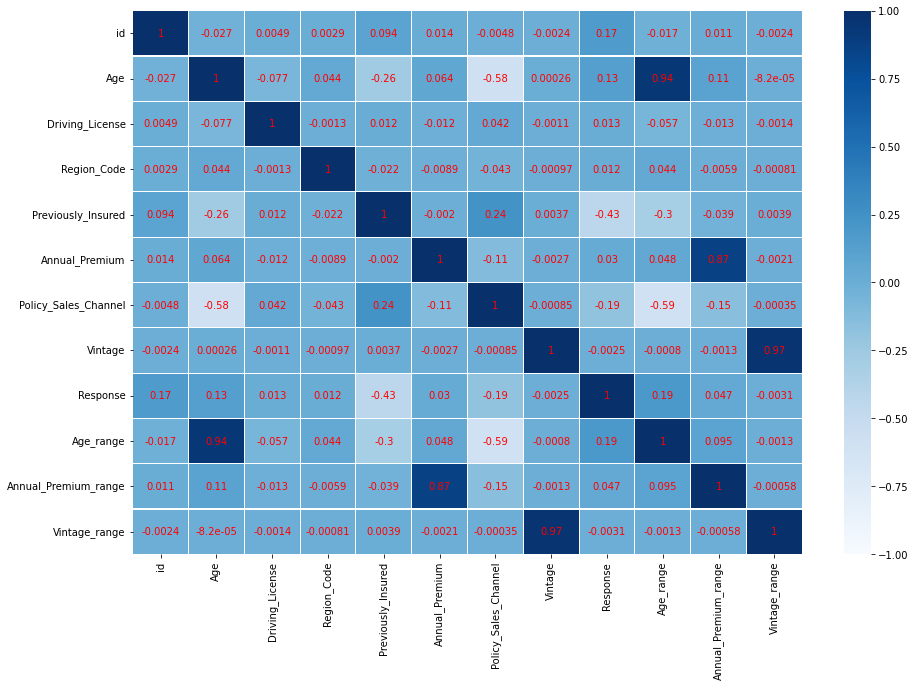

In [ ]:
corr_matrix = data.corr()
#corr_matrix[(corr_matrix < 0.2) & (corr_matrix > -0.2)] = 0
plt.figure(figsize = (15,10))
sns.heatmap(corr_matrix, vmax=1.0, vmin=-1.0, linewidths=0.2,
            annot_kws={"size": 10, "color": "Red"},annot=True, cmap='Blues')

## B- Categorical Attribute Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

for i in data.select_dtypes(include="object").columns:
    data[i] = lb.fit_transform(data[i])
    test[i] = lb.fit_transform(test[i])


## D- Feature Scaling

In [ ]:
# In boosting Algorithim I did not use this
"""
from sklearn.preprocessing import StandardScaler
num_feat = ['Age','Annual_Premium']
sc = StandardScaler()
data[num_feat] = sc.fit_transform(data[num_feat])
test[num_feat] = sc.transform(test[num_feat])
"""

## - Split data &  model Selection

In [ ]:
data_target = data['Response']

In [ ]:
from sklearn.model_selection import cross_val_score ,GridSearchCV
from sklearn.metrics import mean_squared_error,f1_score,classification_report
from imblearn.ensemble import BalancedBaggingClassifier,EasyEnsembleClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier,BaggingClassifier
import math
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(data,data_target, test_size=0.25, random_state=42,stratify=data["Response"])
x_train.drop("Response",axis=1,inplace=True)
x_test.drop("Response",axis=1,inplace=True)

In [ ]:
data.drop("Response",axis=1,inplace=True)
data_col = data.columns
test = test.reindex(data_col, axis=1)

### **Model-1**

In [ ]:
classifier = BalancedBaggingClassifier(estimator=LGBMClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=45)
classifier.fit(x_train, y_train)

BalancedBaggingClassifier(estimator=LGBMClassifier(), random_state=45,
                          sampling_strategy='not majority')

In [ ]:
classifier.get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator__boosting_type': 'gbdt',
 'estimator__class_weight': None,
 'estimator__colsample_bytree': 1.0,
 'estimator__importance_type': 'split',
 'estimator__learning_rate': 0.1,
 'estimator__max_depth': -1,
 'estimator__min_child_samples': 20,
 'estimator__min_child_weight': 0.001,
 'estimator__min_split_gain': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': -1,
 'estimator__num_leaves': 31,
 'estimator__objective': None,
 'estimator__random_state': None,
 'estimator__reg_alpha': 0.0,
 'estimator__reg_lambda': 0.0,
 'estimator__silent': True,
 'estimator__subsample': 1.0,
 'estimator__subsample_for_bin': 200000,
 'estimator__subsample_freq': 0,
 'estimator': LGBMClassifier(),
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'replacement': False,
 'sampler': None,
 'sampling_strategy': 'not majority',
 'verbose': 0,

In [ ]:
y_pred= classifier.predict(x_test)
score = classification_report(y_test, y_pred)
print(score)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     51141
           1       1.00      0.39      0.56     10004

    accuracy                           0.90     61145
   macro avg       0.94      0.69      0.75     61145
weighted avg       0.91      0.90      0.88     61145



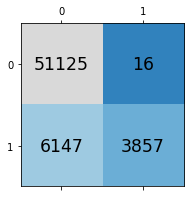

In [ ]:
conf_matrix=confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(4, 3))
ax.matshow(conf_matrix, cmap=plt.cm.tab20c)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

In [ ]:
classifier = BalancedBaggingClassifier(base_estimator=LGBMClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
classifier.fit(data, data_target)
y_pred= classifier.predict(data)
score = classification_report(data_target, y_pred)
print(score)

/usr/local/lib/python3.8/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.89      1.00      0.94    204561
           1       1.00      0.38      0.55     40017

    accuracy                           0.90    244578
   macro avg       0.95      0.69      0.75    244578
weighted avg       0.91      0.90      0.88    244578



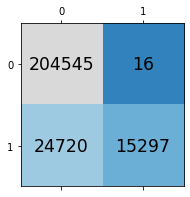

In [ ]:
conf_matrix=confusion_matrix(data_target,y_pred)
fig, ax = plt.subplots(figsize=(4, 3))
ax.matshow(conf_matrix, cmap=plt.cm.tab20c)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

In [ ]:
param_grid = {
    'base_estimator__max_depth' : [1, 2],
    'max_samples' : [0.05, 0.1]
}

classifier = GridSearchCV(BalancedBaggingClassifier(LGBMClassifier()),param_grid)
classifier.fit(x_train, y_train)

**UNDER SAMPLING**

In [ ]:
classifier = BalancedBaggingClassifier(base_estimator=LGBMClassifier(),
                                sampling_strategy="not minority",
                                replacement=False,
                                random_state=42)
classifier.fit(x_train, y_train)

In [ ]:
y_pred= classifier.predict(x_test)
score = classification_report(y_test, y_pred)
print(score)

              precision    recall  f1-score   support

           0       0.98      0.74      0.84     51141
           1       0.41      0.93      0.57     10004

    accuracy                           0.77     61145
   macro avg       0.70      0.83      0.71     61145
weighted avg       0.89      0.77      0.80     61145



In [ ]:
conf_matrix=confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(4, 3))
ax.matshow(conf_matrix, cmap=plt.cm.tab20c)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

### **Model-2**

In [ ]:
classifier = BalancedBaggingClassifier(estimator=XGBClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=45)
classifier.fit(x_train, y_train)

In [ ]:
classifier.get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator__boosting_type': 'gbdt',
 'estimator__class_weight': None,
 'estimator__colsample_bytree': 1.0,
 'estimator__importance_type': 'split',
 'estimator__learning_rate': 0.1,
 'estimator__max_depth': -1,
 'estimator__min_child_samples': 20,
 'estimator__min_child_weight': 0.001,
 'estimator__min_split_gain': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': -1,
 'estimator__num_leaves': 31,
 'estimator__objective': None,
 'estimator__random_state': None,
 'estimator__reg_alpha': 0.0,
 'estimator__reg_lambda': 0.0,
 'estimator__silent': True,
 'estimator__subsample': 1.0,
 'estimator__subsample_for_bin': 200000,
 'estimator__subsample_freq': 0,
 'estimator': LGBMClassifier(),
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'replacement': False,
 'sampler': None,
 'sampling_strategy': 'not majority',
 'verbose': 0,

In [ ]:
y_pred= classifier.predict(x_test)
score = classification_report(y_test, y_pred)
print(score)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     51141
           1       1.00      0.39      0.56     10004

    accuracy                           0.90     61145
   macro avg       0.94      0.69      0.75     61145
weighted avg       0.91      0.90      0.88     61145



In [ ]:
conf_matrix=confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(4, 3))
ax.matshow(conf_matrix, cmap=plt.cm.tab20c)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

In [ ]:
classifier = BalancedBaggingClassifier(base_estimator=XGBClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
classifier.fit(data, data_target)
y_pred= classifier.predict(data)
score = classification_report(data_target, y_pred)
print(score)

In [ ]:
conf_matrix=confusion_matrix(data_target,y_pred)
fig, ax = plt.subplots(figsize=(4, 3))
ax.matshow(conf_matrix, cmap=plt.cm.tab20c)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

In [ ]:
param_grid = {
    'base_estimator__max_depth' : [1, 2],
    'max_samples' : [0.05, 0.1]
}

classifier = GridSearchCV(BalancedBaggingClassifier(XGBClassifier()),param_grid)
classifier.fit(x_train, y_train)

**UNDER SAMPLING**

In [ ]:
classifier = BalancedBaggingClassifier(base_estimator=XGBClassifier(),
                                sampling_strategy="not minority",
                                replacement=False,
                                random_state=42)
classifier.fit(x_train, y_train)

In [ ]:
y_pred= classifier.predict(x_test)
score = classification_report(y_test, y_pred)
print(score)

              precision    recall  f1-score   support

           0       0.98      0.74      0.84     51141
           1       0.41      0.93      0.57     10004

    accuracy                           0.77     61145
   macro avg       0.70      0.83      0.71     61145
weighted avg       0.89      0.77      0.80     61145



In [ ]:
conf_matrix=confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(4, 3))
ax.matshow(conf_matrix, cmap=plt.cm.tab20c)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

### **Model-3**

In [ ]:
classifier = BalancedBaggingClassifier(estimator=RandomForestClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=45)
classifier.fit(x_train, y_train)


In [ ]:
classifier.get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator__boosting_type': 'gbdt',
 'estimator__class_weight': None,
 'estimator__colsample_bytree': 1.0,
 'estimator__importance_type': 'split',
 'estimator__learning_rate': 0.1,
 'estimator__max_depth': -1,
 'estimator__min_child_samples': 20,
 'estimator__min_child_weight': 0.001,
 'estimator__min_split_gain': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': -1,
 'estimator__num_leaves': 31,
 'estimator__objective': None,
 'estimator__random_state': None,
 'estimator__reg_alpha': 0.0,
 'estimator__reg_lambda': 0.0,
 'estimator__silent': True,
 'estimator__subsample': 1.0,
 'estimator__subsample_for_bin': 200000,
 'estimator__subsample_freq': 0,
 'estimator': LGBMClassifier(),
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'replacement': False,
 'sampler': None,
 'sampling_strategy': 'not majority',
 'verbose': 0,

In [ ]:
y_pred= classifier.predict(x_test)
score = classification_report(y_test, y_pred)
print(score)

In [ ]:
conf_matrix=confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(4, 3))
ax.matshow(conf_matrix, cmap=plt.cm.tab20c)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

In [ ]:
classifier = BalancedBaggingClassifier(base_estimator=RandomForestClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
classifier.fit(data, data_target)
y_pred= classifier.predict(data)
score = classification_report(data_target, y_pred)
print(score)

In [ ]:
conf_matrix=confusion_matrix(data_target,y_pred)
fig, ax = plt.subplots(figsize=(4, 3))
ax.matshow(conf_matrix, cmap=plt.cm.tab20c)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

In [ ]:
param_grid = {
    'base_estimator__max_depth' : [1, 2],
    'max_samples' : [0.05, 0.1]
}

classifier = GridSearchCV(BalancedBaggingClassifier(RandomForestClassifier()),param_grid)
classifier.fit(x_train, y_train)

**UNDER SAMPLING**

In [ ]:
classifier = BalancedBaggingClassifier(base_estimator=RandomForestClassifier(),
                                sampling_strategy="not minority",
                                replacement=False,
                                random_state=42)
classifier.fit(x_train, y_train)

In [ ]:
y_pred= classifier.predict(x_test)
score = classification_report(y_test, y_pred)
print(score)

In [ ]:
conf_matrix=confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(4, 3))
ax.matshow(conf_matrix, cmap=plt.cm.tab20c)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

In [ ]:
classifier = BalancedBaggingClassifier(base_estimator=RandomForestClassifier(),
                                sampling_strategy='not minority',
                                replacement=False,
                                random_state=42)
classifier.fit(x_train, y_train)
y_pred= classifier.predict(data)
score = classification_report(data_target, y_pred)
print(score)

In [ ]:
conf_matrix=confusion_matrix(data_target,y_pred)
fig, ax = plt.subplots(figsize=(4, 3))
ax.matshow(conf_matrix, cmap=plt.cm.tab20c)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

# 4-Test data Section


In [ ]:
sample = pd.read_csv("/content/sample_submission.csv")
sample

,id,target
0,380337,0.5
1,60095,0.5
2,491957,0.5
3,42481,0.5
4,25992,0.5
...,...,...
61140,287750,0.5
61141,80519,0.5
61142,314520,0.5
61143,60089,0.5


In [ ]:
model=  BalancedBaggingClassifier(estimator=LGBMClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
cl_model =model.fit(data,data_target)
predicted = cl_model.predict(test)
final_pred = pd.DataFrame()
final_pred["id"] = ID_test
final_pred["Response"] = predicted

In [ ]:
final_pred

,id,Response
0,380337,0
1,60095,0
2,491957,1
3,42481,0
4,25992,0
...,...,...
61140,287750,0
61141,80519,0
61142,314520,0
61143,60089,0


In [ ]:
final_pred.to_csv('submission.csv', index=False)

# Finally! 😎